<a href="https://colab.research.google.com/github/mobinapourmoshir/Functional-Deep-Learning/blob/main/Parallelizing_Neural_Network_Training_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 12: Parallelizing Neural Network Training with PyTorch
Machine Learning with PyTorch and Scikit-Learn: Develop Machine Learning and Deep Learning Models with Python Book by Liu Yuxi, Sebastian Raschka, and Vahid Mirjalili

Main Ideas of Chapter 12:
- How PyTorch improves training performance
- Working with PyTorch's Dataset and DataLoader to build input pipelines and enable efficient
model training
- Working with PyTorch to write optimized machine learning code
- Using the torch.nn module to implement common deep learning architectures conveniently
- Choosing activation functions for artificial NNs

https://docs.pytorch.org/docs/stable/index.html

### What is PyTorch?
There are some performance challenges like limitations of CPUs and some models need tuning huge number of parameters (e.g., MNIST required ~80,000 parameters) and the solution is using GPUs that act like small, massively parallel computer clusters. However, Programming GPUs directly (using CUDA or OpenCL) is complex and inconvenient. The goog news is PyTorch simplifies GPU-based machine learning by handling these low-level details.

PyTorch is a scalable, multiplatform framework for implementing and running machine learning and deep learning algorithms.
PyTorch tensors are like NumPy arrays, but support GPU acceleration and automatic differentiation.

Different types of tensor in PyTorch:

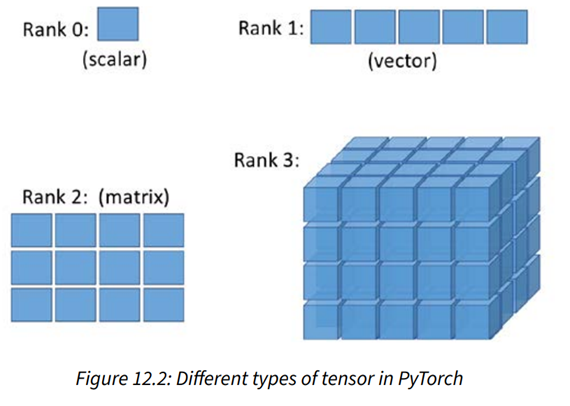

## Creating tensors in PyTorch

In [1]:
import torch
import numpy as np
np.set_printoptions(precision=3) # How many decimal places are shown when printing NumPy arrays.
# Rank 1 tensors (vectors)
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b) # Converts a NumPy array b into a PyTorch tensor t_b.
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [7]:
# Rank 2 tensors (matrices)
t_ones = torch.ones(2, 3)
print(t_ones)
t_ones.shape

tensor([[1., 1., 1.],
        [1., 1., 1.]])


torch.Size([2, 3])

In [10]:
# Creating a tensor of random values
rand_tensor = torch.rand(2, 3)
print(rand_tensor)

tensor([[0.9053, 0.6851, 0.2816],
        [0.6098, 0.5338, 0.5317]])


##Manipulating the data type and shape of a tensor

In [11]:
t_a_new = t_a.to(torch.int64) # torch.to(): change the data type of a tensor to a desired type
print(t_a_new.dtype)

torch.int64


In [12]:
# Transposing the shape of a tensor matrix
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 0, 1)
print(t.shape, ' --> ', t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


In [14]:
# Reshaping a tensor (for example, from a 1D vector to a 2D array)
t = torch.rand(30) # A vector
t_reshape = t.reshape(5, 6) # A matrix
print(t_reshape)
print(t_reshape.shape)

tensor([[0.5846, 0.4272, 0.5167, 0.8192, 0.3211, 0.1602],
        [0.1323, 0.2516, 0.3372, 0.2990, 0.0882, 0.3748],
        [0.8989, 0.8644, 0.7881, 0.2492, 0.1251, 0.2194],
        [0.4284, 0.3457, 0.8724, 0.8868, 0.7353, 0.6301],
        [0.0559, 0.6860, 0.4911, 0.7620, 0.5675, 0.7225]])
torch.Size([5, 6])


In [18]:
# Removing the unnecessary dimensions (dimensions that have size 1, which are not needed):
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t, 2)
print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


## Applying mathematical operations to tensors

In [21]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1
print("t1: ",t1)
t2 = torch.normal(mean=0, std=1, size=(5, 2))
print("t2: ",t2)

t1:  tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
t2:  tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])


In [22]:
t3 = torch.multiply(t1, t2) # element-wise product of t1 and t2
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [26]:
#  To compute the mean, sum, and standard deviation along a certain axis (or axes) we can use: torch.mean(), torch.sum(), torch.std()
t4 = torch.mean(t1, axis=0) # Mean
print("Mean: \n", t4)
# matrix-matrix product between t1 and t2 (t1 * t2^T)
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print("product t1 * t2^T: \n",t5)
# t1^T * t2
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)
print("product t1^T * t2: \n",t6)

Mean: 
 tensor([-0.1373,  0.2028])
product t1 * t2^T: 
 tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])
product t1^T * t2: 
 tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [27]:
# computing the L^p norm of a tensor
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


## Split, stack, and concatenate tensors
In this subsection, we will cover PyTorch operations for splitting a tensor into multiple tensors, or  the reverse: stacking and concatenating multiple tensors into a single one.

- Splitting into two or more tensors: **torch.chunk()** which divides an input tensor into a list of equally sized tensors or we can provide the desired sizes in a list using the torch.split() function.

- Concatenating or stacking multiple tensors to create a single tensor: **torch.stack() and torch.cat()**

In [28]:
### Splitting ###
# Providing the number of splits
torch.manual_seed(1)
t = torch.rand(6)
print("t: ",t)
t_splits = torch.chunk(t, 3)
[item.numpy() for item in t_splits]

t:  tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [30]:
# Providing the sizes of different splits
torch.manual_seed(1)
t = torch.rand(5)
print("t: ",t)
t_splits = torch.split(t, split_size_or_sections=[3, 2])
[item.numpy() for item in t_splits]

t:  tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

In [31]:
### concatenating or stacking ###
# Vectors
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [32]:
# matrices
A = torch.ones(3)
B = torch.zeros(3)
S = torch.stack([A, B], axis=1)
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])
